In [32]:
# Import packages
import pandas as pd
import numpy as np
import requests
import requests_cache
import pandas as pd
import time
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import json 
import matplotlib.pyplot as plt; plt.rcdefaults()
from decimal import Decimal
from scipy import stats
from matplotlib import pylab
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Read the dataset
data = pd.read_csv('USvideos.csv')

## Explore the Dataset and Cleaning the Data

In [34]:
# Explore the Dataset
data.describe()
data.columns
data.count()

# Clean the Data
# We noticed there are duplicated videos within the dataset.
# Because a single video can be trending for many days. 
# We calculate the Frequency of each video and make it a variable in the dataset
data['frequency'] = data.groupby('video_id')['video_id'].transform('count')

# Now we can remove the duplicates 
data = data.drop_duplicates('video_id',keep='last')

# Now we want to have the name of the category instead of just the category id
# There is a separate file containing the name categories 
category_file = open('US_category_id.json')
category = json.load(category_file)

# Now we want to display the categories as a DataFrame
height = 32
width = 2
category_df = pd.DataFrame(0, index=range(height), columns=range(width))
category_df.columns = ['category_id','category_name']
category_df

for i in range(32):
    try:
        category_df['category_id'][i] = category['items'][i]['id']
        category_df['category_name'][i] = category['items'][i]['snippet']['title']
    except:
        pass
category_df

# Now we merge the category with the data containing video information
data = pd.merge(data,category_df,on=['category_id'])
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,frequency,category_name
0,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,Sports
1,fIQ2Ty2OL34,17.14.11,James Harden Triple-Double 2017.11.09 vs Cavs ...,FreeDawkins,17,2017-11-10T04:00:52.000Z,"nba|""basketball""|""dawkins""|""dawk""|""ins""|""dawki...",18573,420,10,236,https://i.ytimg.com/vi/fIQ2Ty2OL34/default.jpg,False,False,False,--Take your ball handling to the next level wi...,1,Sports
2,agKDPntMv-E,17.14.11,Stephen A. Smith slams the Philadelphia 76ers ...,ESPN,17,2017-11-08T15:59:06.000Z,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,1,Sports
3,Xl38SuxyrgM,17.14.11,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",LetsGoWarriors,17,2017-11-09T07:27:32.000Z,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,1,Sports
4,0zk2SwmCpss,17.15.11,Joel Embiid Full Highlights 2017.11.13 at Clip...,FreeDawkins,17,2017-11-14T06:24:27.000Z,"nba|""basketball""|""dawkins""|""dawk""|""ins""|""dawki...",63780,831,12,301,https://i.ytimg.com/vi/0zk2SwmCpss/default.jpg,False,False,False,--Take your ball handling to the next level wi...,1,Sports
5,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,2,Sports
6,069D0NmW39o,17.15.11,"Wildest Superstar distractions: WWE Top 10, No...",WWE,17,2017-11-11T15:00:00.000Z,"wwe|""world wrestling entertainment""|""wrestling...",1155622,16060,883,1018,https://i.ytimg.com/vi/069D0NmW39o/default.jpg,False,False,False,A timely distraction can create real trouble f...,2,Sports
7,ttf_EzEkxBk,17.15.11,"Roy Halladay Plane Crash Video, Witnesses Say ...",TMZSports,17,2017-11-08T17:29:15.000Z,"TMZ|""TMZ Sports""|""TMZ Sports Channel""|""TMZ 201...",3505996,5934,3400,5162,https://i.ytimg.com/vi/ttf_EzEkxBk/default.jpg,False,False,False,Roy Halladay appeared to be hot doggin' it in ...,1,Sports
8,oRF2-ZloSqg,17.16.11,AJ Styles & Daniel Bryan warn Brock Lesnar abo...,WWE,17,2017-11-15T02:26:15.000Z,"wwe|""world wrestling entertainment""|""wrestling...",845763,17929,502,2325,https://i.ytimg.com/vi/oRF2-ZloSqg/default.jpg,False,False,False,Daniel Bryan & The Phenomenal One have strong ...,1,Sports
9,KJ12FVmumeA,17.16.11,Stephen A. Smith: Jay Cutler is a 'disease' | ...,ESPN,17,2017-11-14T16:28:34.000Z,"espn|""espn live""|""stephen a smith""|""stephen a....",281868,1546,245,885,https://i.ytimg.com/vi/KJ12FVmumeA/default.jpg,False,False,False,First Take's Stephen A. Smith goes on an epic ...,2,Sports


## Fully-Capitalized Video Title

In [35]:
# Create a function to check whether the title of the video is fully-capitalized. 
def check_title(title):
    """This function checks if the title of the video is fully-capitalized. It takes in the title of the video as the parameter."""
    if title.isupper() == True:
        return True
    else:
        return False

In [36]:
# Create an empty DataFrame to contain videos with fully-capitalized titles
height = len(data)
width = 2
capitalized_df = pd.DataFrame(0, index=range(height), columns=range(width))
capitalized_df.columns = ['title','capitalized_title']
capitalized_df

for i in range(len(data)):
    title = data.title[i]
    result = check_title(title)
    views = data.views[i]
    capitalized_df['title'][i] = title
    capitalized_df['capitalized_title'][i] = result
    
# Merge the dataframe with the data
# Now, there is a boolean column shows whether the title is capitalized 
capitalized_df = pd.merge(capitalized_df,data,on=['title'])
capitalized_df

,title,capitalized_title,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,frequency,category_name
0,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,False,9wRQljFNDW8,17.14.11,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,Sports
1,James Harden Triple-Double 2017.11.09 vs Cavs ...,False,fIQ2Ty2OL34,17.14.11,FreeDawkins,17,2017-11-10T04:00:52.000Z,"nba|""basketball""|""dawkins""|""dawk""|""ins""|""dawki...",18573,420,10,236,https://i.ytimg.com/vi/fIQ2Ty2OL34/default.jpg,False,False,False,--Take your ball handling to the next level wi...,1,Sports
2,Stephen A. Smith slams the Philadelphia 76ers ...,False,agKDPntMv-E,17.14.11,ESPN,17,2017-11-08T15:59:06.000Z,"espn|""espn live""|""first take""|""first take espn...",470191,4037,430,1553,https://i.ytimg.com/vi/agKDPntMv-E/default.jpg,False,False,False,First Take's Stephen A. Smith slams the Philad...,1,Sports
3,"STEPH CURRY and OMRI CASSPI, postgame GSW (9-3...",False,Xl38SuxyrgM,17.14.11,LetsGoWarriors,17,2017-11-09T07:27:32.000Z,"DubNation|""Golden State Warriors""|""Golden Stat...",16305,147,13,47,https://i.ytimg.com/vi/Xl38SuxyrgM/default.jpg,False,False,False,Previous video: Draymond postgame https://yout...,1,Sports
4,Joel Embiid Full Highlights 2017.11.13 at Clip...,False,0zk2SwmCpss,17.15.11,FreeDawkins,17,2017-11-14T06:24:27.000Z,"nba|""basketball""|""dawkins""|""dawk""|""ins""|""dawki...",63780,831,12,301,https://i.ytimg.com/vi/0zk2SwmCpss/default.jpg,False,False,False,--Take your ball handling to the next level wi...,1,Sports
5,Stephon Marbury and Jimmer Fredette fight in C...,False,sbcbvuitiTc,17.15.11,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,2,Sports
6,"Wildest Superstar distractions: WWE Top 10, No...",False,069D0NmW39o,17.15.11,WWE,17,2017-11-11T15:00:00.000Z,"wwe|""world wrestling entertainment""|""wrestling...",1155622,16060,883,1018,https://i.ytimg.com/vi/069D0NmW39o/default.jpg,False,False,False,A timely distraction can create real trouble f...,2,Sports
7,"Roy Halladay Plane Crash Video, Witnesses Say ...",False,ttf_EzEkxBk,17.15.11,TMZSports,17,2017-11-08T17:29:15.000Z,"TMZ|""TMZ Sports""|""TMZ Sports Channel""|""TMZ 201...",3505996,5934,3400,5162,https://i.ytimg.com/vi/ttf_EzEkxBk/default.jpg,False,False,False,Roy Halladay appeared to be hot doggin' it in ...,1,Sports
8,AJ Styles & Daniel Bryan warn Brock Lesnar abo...,False,oRF2-ZloSqg,17.16.11,WWE,17,2017-11-15T02:26:15.000Z,"wwe|""world wrestling entertainment""|""wrestling...",845763,17929,502,2325,https://i.ytimg.com/vi/oRF2-ZloSqg/default.jpg,False,False,False,Daniel Bryan & The Phenomenal One have strong ...,1,Sports
9,Stephen A. Smith: Jay Cutler is a 'disease' | ...,False,KJ12FVmumeA,17.16.11,ESPN,17,2017-11-14T16:28:34.000Z,"espn|""espn live""|""stephen a smith""|""stephen a....",281868,1546,245,885,https://i.ytimg.com/vi/KJ12FVmumeA/default.jpg,False,False,False,First Take's Stephen A. Smith goes on an epic ...,2,Sports


Text(0, 0.5, 'Number of Views')

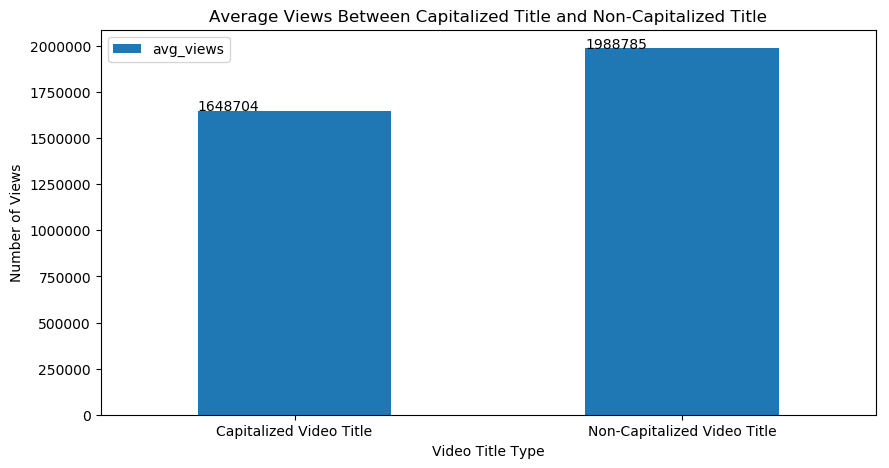

In [38]:
# Calculate the average view between videos with fully-capitalized titles and videos titles that are not fully-capitalized
avg_view_cap = capitalized_df[capitalized_df.capitalized_title == True].views.sum()/len(capitalized_df[capitalized_df.capitalized_title == True])
avg_view_noncap = capitalized_df[capitalized_df.capitalized_title != True].views.sum()/len(capitalized_df[capitalized_df.capitalized_title != True])

# Create an empty dataframe containing the average views of different video titles
height = 2
width = 2
title_df = pd.DataFrame(0, index=range(height), columns=range(width))
title_df.columns = ['Video Title Type','avg_views']
title_df['Video Title Type'][0] = 'Capitalized Video Title'
title_df['Video Title Type'][1] = 'Non-Capitalized Video Title'
title_df['avg_views'][0] = avg_view_cap
title_df['avg_views'][1] = avg_view_noncap
title_df

# Create a bar plot showing the average views of different video titles
ax = title_df.plot.bar(x='Video Title Type', y='avg_views', rot=0,figsize=(10,5),title='Average Views Between Capitalized Title and Non-Capitalized Title')
for p in ax.patches:
    ax.annotate('{}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
plt.ylabel('Number of Views')






